<a href="https://colab.research.google.com/github/naotoo1/ANN-ddc-with-Pytorch-and-Skorch/blob/main/ANN_with_pytorch_and_skorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U skorch

     |████████████████████████████████| 155 kB 12.6 MB/s 


**Import Libraries**

In [2]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.nn.functional as F
from skorch import NeuralNetClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

**Import Data set** **bold text**

In [3]:
data = pd.read_csv('pima-indians-diabetes.csv')


**Check null values**

In [4]:
data.isnull().sum()

pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThicness                0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Split data**

In [5]:
X = data.drop('Outcome', axis=1).values
y = data['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Convert data to tensor**

In [6]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


**Build ANN** 

---


The m parameter is introduced to allow the same ANN build to be used by for GridSearch and Non-GridSearch

In [7]:
class ANN_Module(nn.Module):
    def __init__(self, m, input_features=8, hidden1=20, hidden2=20, hidden3=20, output_features=2):
        super(ANN_Module, self).__init__()
        self.m = m
        self.f_connected1 = nn.Linear(input_features, hidden1)
        self.dropout = nn.Dropout(0.2)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.f_connected3 = nn.Linear(hidden2, hidden3)
        self.out = nn.Linear(hidden3, output_features)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        x = F.relu(self.f_connected1(x))
        x = self.dropout(x)
        x = F.relu(self.f_connected2(x))
        x = self.dropout(x)
        x = F.relu(self.f_connected3(x))
        x = self.dropout(x)
        if self.m == 'm':
            x = self.out(x)
            return x
        if self.m == 'a':
            x = self.softmax(self.out(x))
            return x

**Seed for reproducible results**

In [8]:
torch.manual_seed(20)

**Create the ANN model**

In [9]:
# choose m='m' for non Grid Search
model = ANN_Module(m='m')

**Summary of model parameters**

In [10]:
print(model.parameters)

<bound method Module.parameters of ANN_Module(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (f_connected3): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
  (softmax): Softmax(dim=-1)
)>


**Set loss function and optimizer**

In [11]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

**Train the ANN model using the train set**

In [12]:
epoch = 500
final_losses = []
for i in range(epoch):
    i = i + 1
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_losses.append(loss)
    if i % 10 == 1:
        print('Epoch number:{} and the loss:{}'.format(i, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
 

Epoch number:1 and the loss:1.497496247291565
Epoch number:11 and the loss:0.6851723194122314
Epoch number:21 and the loss:0.6576101183891296
Epoch number:31 and the loss:0.6379138827323914
Epoch number:41 and the loss:0.6259263157844543
Epoch number:51 and the loss:0.6215735673904419
Epoch number:61 and the loss:0.6067336797714233
Epoch number:71 and the loss:0.5904703140258789
Epoch number:81 and the loss:0.5894325375556946
Epoch number:91 and the loss:0.5959255695343018
Epoch number:101 and the loss:0.5753591060638428
Epoch number:111 and the loss:0.5672772526741028
Epoch number:121 and the loss:0.5664903521537781
Epoch number:131 and the loss:0.5772939920425415
Epoch number:141 and the loss:0.554319441318512
Epoch number:151 and the loss:0.5484814047813416
Epoch number:161 and the loss:0.5689600110054016
Epoch number:171 and the loss:0.562962532043457
Epoch number:181 and the loss:0.5461196899414062
Epoch number:191 and the loss:0.5267633199691772
Epoch number:201 and the loss:0.53

**Visualize training performance**

Text(0.5, 0, 'Number of epochs')

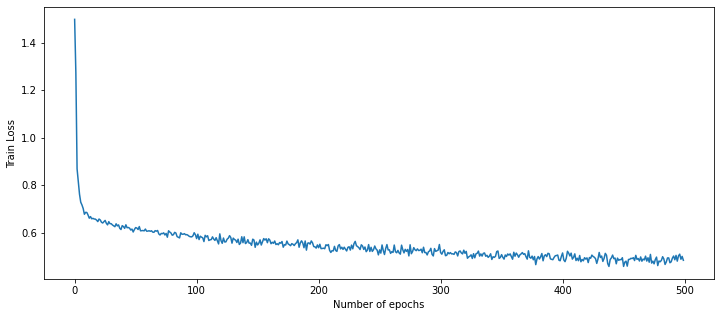

In [13]:
plt.rcParams["figure.figsize"] = (12,5)
final_losses = torch.tensor(final_losses,requires_grad=True)
final_losses = final_losses.detach().numpy()
plt.plot(range(epoch), final_losses,)
plt.ylabel('Train Loss')
plt.xlabel('Number of epochs')

**Make Predictions using the ANN model**

In [14]:
final_prediction = []
with torch.no_grad():
    for i, datas in enumerate(X_test):
        y_pred = model(datas)
        final_prediction.append(y_pred.argmax().item())
final_prediction = torch.tensor(final_prediction)
print(final_prediction)
print(y_test)

tensor([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
        1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
 

**Accuracy of the model for the test set**

In [15]:
acc = accuracy_score(y_test, final_prediction)
print(acc)

0.7727272727272727


**Summary of confusion matrix**

In [16]:
cm = confusion_matrix(y_test, final_prediction)
print(cm)


[[92 15]
 [20 27]]


**Visualize the confusion matrix**

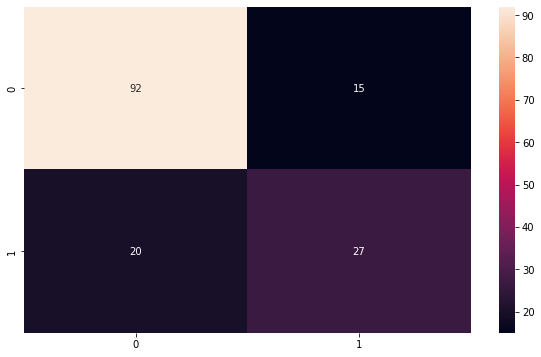

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True)
plt.show()

**Save model**

In [18]:
torch.save(model, 'diabetes.pt')

**Load model**

In [19]:
model1 = torch.load('diabetes.pt')

**Summary of model evaluation**

In [20]:
print(model.eval())


ANN_Module(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (f_connected3): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
  (softmax): Softmax(dim=-1)
)


**Predict using saved model**

In [21]:
# predict using the saved model
new_data = X[2:10]
new_data = torch.FloatTensor(new_data)
pred = [model1(data).argmax().item() for data in new_data]
print(pred)

[1, 0, 1, 0, 0, 1, 1, 1]


**Automate the ANN for optimal hyperparameter search**

In [22]:
net = NeuralNetClassifier(
    ANN_Module(m='a'),
    max_epochs=10,
    lr=0.1,
    # optimizer=torch.optim.Adam, criterion=torch.nn.CrossEntropyLoss(),
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
)


**Fit to the train set**

In [23]:
net.fit(X_train, y_train)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.8200       0.6585        0.6396  0.0294
      2        0.6741       0.6016        0.6493  0.0130
      3        0.6558       0.6341        0.6440  0.0209
      4        0.6521       0.6341        0.6406  0.0153
      5        0.6486       0.6341        0.6467  0.0190
      6        0.6509       0.6179        0.6578  0.0198
      7        0.6581       0.6341        0.6434  0.0159
      8        0.6431       0.6341        0.6416  0.0152
      9        0.6426       0.6423        0.6386  0.0237
     10        0.6389       0.6748        0.6347  0.0158


<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=ANN_Module(
    (f_connected1): Linear(in_features=8, out_features=20, bias=True)
    (dropout): Dropout(p=0.2, inplace=False)
    (f_connected2): Linear(in_features=20, out_features=20, bias=True)
    (f_connected3): Linear(in_features=20, out_features=20, bias=True)
    (out): Linear(in_features=20, out_features=2, bias=True)
    (softmax): Softmax(dim=-1)
  ),
)

**Set parameters for Grid search**

In [24]:
from sklearn.model_selection import GridSearchCV
net.set_params(train_split=False, verbose=0)
params = {
    'lr': [0.01, 0.02],
    'max_epochs': [10, 500],
    'module__hidden1': [20, 50],
    'module__hidden2': [20, 50],
    'module__hidden3': [20, 50],
    'module__m': ['a'],
}
gs = GridSearchCV(net, params, refit=True, cv=3, scoring='accuracy', verbose=2)


**Fit the Grid Search to the train data**

In [25]:
gs.fit(X_train, y_train)
print("best score: {:.3f}, best params: {}".format(gs.best_score_, gs.best_params_))


Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END lr=0.01, max_epochs=10, module__hidden1=20, module__hidden2=20, module__hidden3=20, module__m=a; total time=   0.1s
[CV] END lr=0.01, max_epochs=10, module__hidden1=20, module__hidden2=20, module__hidden3=20, module__m=a; total time=   0.1s
[CV] END lr=0.01, max_epochs=10, module__hidden1=20, module__hidden2=20, module__hidden3=20, module__m=a; total time=   0.1s
[CV] END lr=0.01, max_epochs=10, module__hidden1=20, module__hidden2=20, module__hidden3=50, module__m=a; total time=   0.1s
[CV] END lr=0.01, max_epochs=10, module__hidden1=20, module__hidden2=20, module__hidden3=50, module__m=a; total time=   0.1s
[CV] END lr=0.01, max_epochs=10, module__hidden1=20, module__hidden2=20, module__hidden3=50, module__m=a; total time=   0.1s
[CV] END lr=0.01, max_epochs=10, module__hidden1=20, module__hidden2=50, module__hidden3=20, module__m=a; total time=   0.1s
[CV] END lr=0.01, max_epochs=10, module__hidden1=20, module__hid

**Predict using the test set**

In [26]:
y_pred = gs.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.7402597402597403


**Save the ANN model for the GridSearch**

In [27]:
torch.save(gs,'gs_ann.pt')

**Load saved model**

In [28]:
model2 = torch.load('gs_ann.pt')

**Predict using the saved model**

In [29]:
new_data = X[2:10]
new_data = torch.FloatTensor(new_data)
pred = model2.predict(new_data)
pred

array([1, 0, 1, 0, 0, 1, 1, 0])